# Modelos de Regresion Lineal

## Modelo con Datos Simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5) -> N = normal
* Ye = 5 + 1.9 * x + e   -> e = error
* e estará distribuído seún una N(0, 0.8)

In [298]:
import pandas as pd
import numpy as np

In [299]:
x = 1.5 + 2.5 * np.random.randn(100)

In [300]:
res = 0 + 0.8 * np.random.randn(100)   # -> res = residuo

In [301]:
y_pred = 5 + 0.3 * x    # -> pred = predicción

In [302]:
y_act = 5 + 0.3 * x + res   # -> act = actual

In [303]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [304]:
data = pd.DataFrame(
    {
        "x" : x_list,
        "y_actual" : y_act_list,
        "y_prediccion" : y_pred_list
    }
)

In [305]:
data.head()

,x,y_actual,y_prediccion
0,2.548156,4.560985,5.764447
1,-0.442607,5.456395,4.867218
2,-0.062845,4.348453,4.981146
3,4.153368,6.426827,6.246011
4,4.051282,5.486178,6.215385


In [306]:
import matplotlib.pyplot as plt

In [307]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +1)]    # Promedio

Text(0.5, 1.0, 'Valor Actual vs Preddicción')

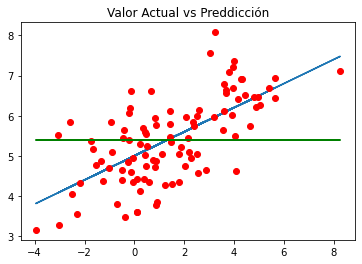

In [308]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Preddicción")

* SSD = Suma de los cuadrados de las diferencias -> Diferencia entre un punto que está fuera de la recta y la recta.
* SST = Suma de los cuadrados totales -> Diferencia entre un punto que no esté sobre la recta y el promedio.
* SSR = Suma de los cuadrados de la regresión -> Diferencia entre la recta (azul) y el promedio (verde)

* SST = SSR + SSD
* R^2 = SSR / SST -> Mientras mas cerca de 1, mejor será el modelo.

In [309]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [310]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.548156,4.560985,5.764447,0.129113,1.448322,0.712572
1,-0.442607,5.456395,4.867218,0.289343,0.347130,0.002629
2,-0.062845,4.348453,4.981146,0.179757,0.400301,1.116554
3,4.153368,6.426827,6.246011,0.707090,0.032695,1.043877
4,4.051282,5.486178,6.215385,0.656522,0.531742,0.006570


In [311]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [312]:
SSR

47.7075746293674

In [313]:
SSD

61.80166804005674

In [314]:
SST

108.30162414343403

In [315]:
 SSR + SSD

109.50924266942414

In [316]:
R2 = SSR / SST
R2

0.4405065483245549

Por lo tanto la predicción de 'y' es bastante acertado con los datos actuales.

(array([ 1.,  5.,  5.,  8., 15., 21., 17., 14.,  8.,  6.]),
 array([-2.10898273, -1.73824834, -1.36751395, -0.99677956, -0.62604517,
        -0.25531078,  0.11542361,  0.486158  ,  0.85689239,  1.22762677,
         1.59836116]),
 <BarContainer object of 10 artists>)

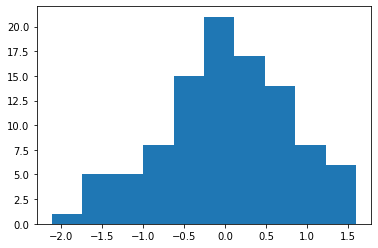

In [317]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la Recta de Regresión

* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [318]:
x_mean = np.mean(data["x"])          ## Promedio de x
y_mean = np.mean(data["y_actual"])   ## Promedio de y
x_mean, y_mean

(1.421043656033578, 5.405124234520571)

In [319]:
# Calcularemos el numerador de beta y luego el denominador
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean) # numerador
data["beta_d"] = (data["x"] - x_mean)**2  # denominador

In [320]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [321]:
alpha = y_mean - beta * x_mean

In [322]:
# Vemos si alpha y beta coinciden con la predicción que habiamos hecho en y_pred ->  (5 y 1.9)
alpha, beta

(4.983810263203154, 0.29648207465588344)

El modelo lineal obtenido por regresión es: y = 5.120693569826769 + 1.897407646337951 * x

In [323]:
# Creamos en el dataframe una columna adicional y_model
data["y_model"] = alpha + beta * data["x"]

In [324]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.548156,4.560985,5.764447,0.129113,1.448322,0.712572,-0.951441,1.270383,5.739293
1,-0.442607,5.456395,4.867218,0.289343,0.347130,0.002629,-0.095551,3.473193,4.852585
2,-0.062845,4.348453,4.981146,0.179757,0.400301,1.116554,1.567983,2.201926,4.965178
3,4.153368,6.426827,6.246011,0.707090,0.032695,1.043877,2.791624,7.465598,6.215210
4,4.051282,5.486178,6.215385,0.656522,0.531742,0.006570,0.213191,6.918153,6.184943


In [325]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [326]:
SSR, SSD, SST

(46.55140693308677, 61.7502172103473, 108.30162414343398)

In [327]:
R2 = SSR / SST

In [328]:
R2

0.42983110642398475

* R2 usando nuestro modelo -> R2 = 0.9715568951050598
* R2 usando la predicción  -> R2 = 0.9748982615623478

Text(0.5, 1.0, 'Valor Actual vs Preddicción')

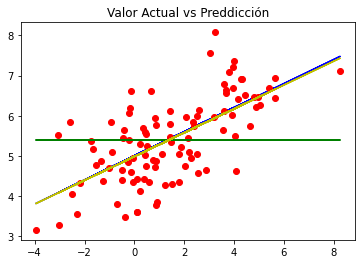

In [329]:
# Graficando
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +1)]    # Promedio
%matplotlib inline
plt.plot(data["x"], data["y_prediccion"], "blue")
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"], "y")
plt.title("Predicciones")

# La predicción "y_prediccion" (azul) es similar a la predicción que realizamos "y_model" (amarillo)

In [ ]:
# Nota: La suma de los cuadrados totales (SST), nunca va a cambiar. En este caso es 108.301

## Error Estandar de los Residuos (RSE)

In [333]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE   ## Mientras más cercano a 0 sea RSE, mejor será el modelo

0.7937910664957385

In [334]:
np.mean(data["y_actual"])

5.405124234520571

In [335]:
RSE / np.mean(data["y_actual"])

0.1468589864088752

In [336]:
# Por lo tanto el modelo tendría un 14% de error.